In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv("/home/martin/Projects/SparseSequentialLearning/results/run_Simulation Example_20250507_140746/log.csv", sep=',', header=0, encoding='utf-8')

In [33]:
df.sort_values(['Name', 'Trial', 'Round'])

# Compute the cumulative reward
df['cum_reward'] = df.groupby(['Name', 'Trial'])['Reward'].cumsum()
df['cum_regret'] = df.groupby(['Name', 'Trial'])['Regret'].cumsum()
df['cum_min_regret'] = df.groupby(['Name', 'Trial'])['Regret'].cummin()
df['cum_avg_regret'] = df['cum_regret'] / df['Round']

data = (
    df
    .groupby(['Name', 'Round'])[['cum_reward', 'cum_regret', 'cum_min_regret', 'cum_avg_regret']]
    .agg(
        avg_cum_reward=('cum_reward', 'mean'),
        std_cum_reward=('cum_reward', 'std'),
        avg_cum_regret=('cum_regret', 'mean'),
        std_cum_regret=('cum_regret', 'std'),
        avg_cum_min_regret=('cum_min_regret', 'mean'),
        std_cum_min_regret=('cum_min_regret', 'std'),
        avg_cum_avg_regret=('cum_avg_regret', 'mean'),
        std_cum_avg_regret=('cum_avg_regret', 'std'),
    )
    .reset_index()
)

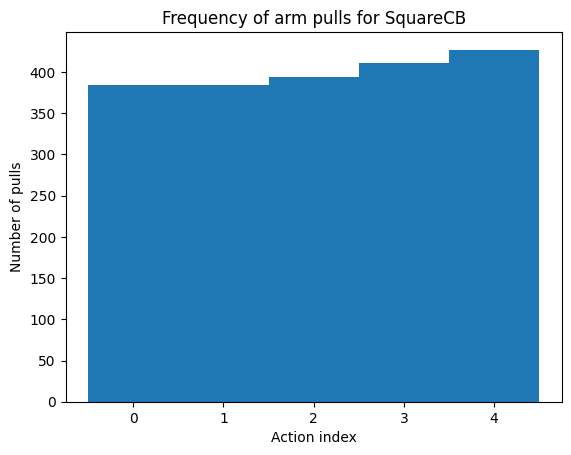

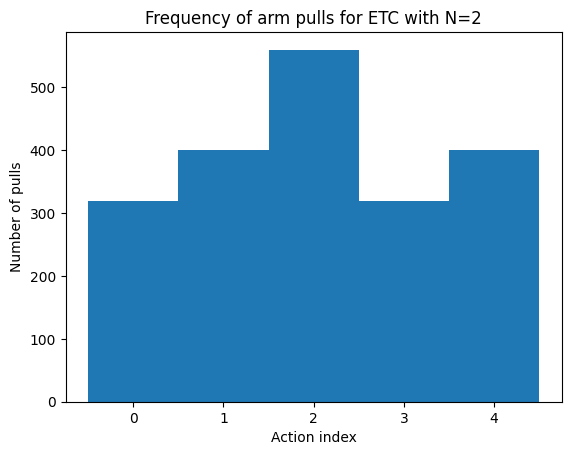

In [34]:
names = df['Name'].to_list()

actions = df[["Name", "Action_index"]]
for name in set(names):
    # time = data.loc[data['Name'] == name, 'Round'].to_numpy()
    # reward = data.loc[data['Name'] == name,'avg_cum_reward'].to_numpy()
    # std_reward = data.loc[data['Name'] == name,'std_cum_reward'].to_numpy()
    vals = actions.loc[actions["Name"] == name]["Action_index"]
    if vals.isna().all():
        continue

    plt.figure()
    plt.hist(vals.to_numpy(), bins=np.arange(vals.min(), vals.max() + 2) - 0.5, align='mid')
    plt.xlabel('Action index')
    plt.ylabel('Number of pulls')
    plt.title(f"Frequency of arm pulls for {name}")

In [41]:
vals = actions.loc[actions["Name"] == "ETC with N=2"]["Action_index"]
vals.value_counts()

Action_index
2    560
4    400
1    400
0    320
3    320
Name: count, dtype: int64

In [29]:
actions[actions["Name"] == "SquareCB"]

,Name,Action_index
0,SquareCB,0.0
1,SquareCB,3.0
2,SquareCB,0.0
3,SquareCB,1.0
4,SquareCB,2.0
...,...,...
1995,SquareCB,0.0
1996,SquareCB,3.0
1997,SquareCB,4.0
1998,SquareCB,0.0


In [31]:
df.loc[df["Name"] == "ETC with N=2"]

,Name,Trial,Round,Context,Action_index,Action,Reward,Regret,Time,cum_reward,cum_regret,cum_min_regret,cum_avg_regret
2000,ETC with N=2,1,1,NaN,NaN,NaN,4.438936,0.050147,2025/05/07-14:02:13,4.438936,0.050147,0.050147,0.050147
2001,ETC with N=2,1,1,[1. 1. 1. 1. 1.],0.0,[0.91346319 0.32205102 0.23038022 0.8038758 0...,4.438936,0.050147,2025/05/07-14:02:13,8.877873,0.100295,0.050147,0.100295
2002,ETC with N=2,1,2,NaN,NaN,NaN,1.303997,3.185086,2025/05/07-14:02:13,10.181870,3.285381,0.050147,1.642691
2003,ETC with N=2,1,2,[1. 1. 1. 1. 1.],1.0,[0.03416006 0.92084469 0.57312702 0.40751638 0...,1.303997,3.185086,2025/05/07-14:02:13,11.485867,6.470468,0.050147,3.235234
2004,ETC with N=2,1,3,NaN,NaN,NaN,1.634112,2.854971,2025/05/07-14:02:13,13.119979,9.325439,0.050147,3.108480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,ETC with N=2,20,98,[1. 1. 1. 1. 1.],3.0,[0.07953421 0.66648157 0.86573096 0.73551423 0...,1.543689,1.237087,2025/05/07-14:02:14,307.174203,237.857814,-0.138979,2.427121
5996,ETC with N=2,20,99,NaN,NaN,NaN,1.292955,1.487820,2025/05/07-14:02:14,308.467158,239.345634,-0.138979,2.417633
5997,ETC with N=2,20,99,[1. 1. 1. 1. 1.],3.0,[0.07953421 0.66648157 0.86573096 0.73551423 0...,1.292955,1.487820,2025/05/07-14:02:14,309.760114,240.833455,-0.138979,2.432661
5998,ETC with N=2,20,100,NaN,NaN,NaN,1.588601,1.192175,2025/05/07-14:02:14,311.348714,242.025630,-0.138979,2.420256


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

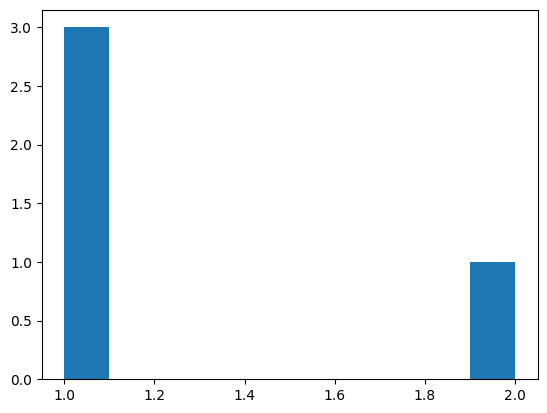